In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', family='serif')
import astropy.units as u
import astropy.coordinates as aco
import hera_pspec
from matplotlib import cm

In [2]:
path = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/CalibratedData/LSThrs_10.5_23.0/FREQrng_530_730/'
pI = 'zen.2457548.16700_66112.pI.HH.uvcRPCS.uvh5.UVP'
pQ = 'zen.2457548.16700_66112.pQ.HH.uvcRPCS.uvh5.UVP'
pU = 'zen.2457548.16700_66112.pU.HH.uvcRPCS.uvh5.UVP'
pV = 'zen.2457548.16700_66112.pV.HH.uvcRPCS.uvh5.UVP'
savepath = '/lustre/aoc/projects/hera/pchichur/HERA19/final_paper_plots_redone/'

In [3]:
uvpI = hera_pspec.UVPSpec()
uvpI.read_hdf5(path+pI)
#uvpQ = hera_pspec.UVPSpec()
#uvpQ.read_hdf5(path+pQ)
#uvpU = hera_pspec.UVPSpec()
#uvpU.read_hdf5(path+pU)
#uvpV = hera_pspec.UVPSpec()
#uvpV.read_hdf5(path+pV)

(16038, 200)


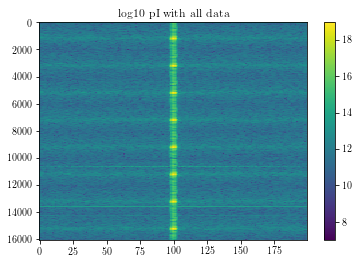

In [4]:
blp = ((9,20),(9,20))
Idata = uvpI.get_data((0, blp, 'pI'))
plt.imshow(np.log10(np.abs(Idata)), aspect='auto')
plt.title('log10 pI with all data')
plt.colorbar()
print Idata.shape

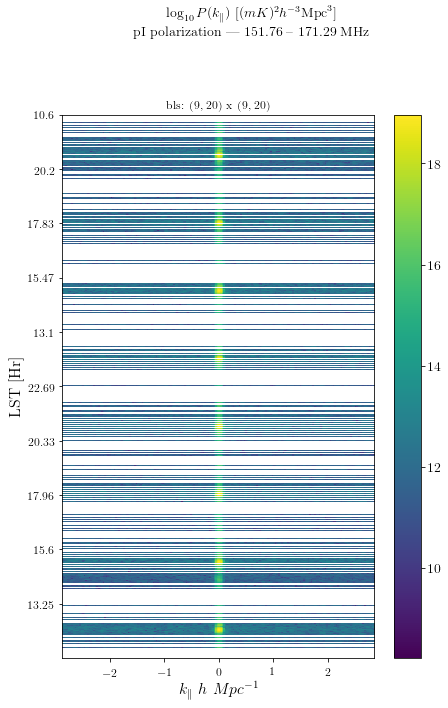

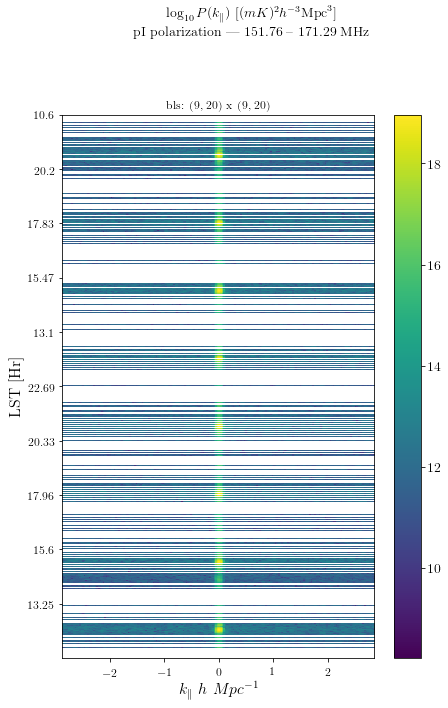

In [5]:
hera_pspec.plot.delay_waterfall(uvp=uvpI, blpairs=[blp], spw=0, pol='pI', component='abs', average_blpairs=False, 
                    fold=False, delay=False, deltasq=False, log=True, lst_in_hrs=True,
                    vmin=None, vmax=None, cmap='viridis', axes=None, figsize=(7, 10),
                    force_plot=False, times=None, title_type='blpair')

In [6]:
hpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/CalibratedData/LSThrs_10.5_23.0/FREQrng_530_730/'
hday1 = '2457548_LST_10_23_highband_pI.uvh5.UVP'
hday2 = '2457549_LST_10_23_highband_pI.uvh5.UVP'
hday3 = '2457550_LST_10_23_highband_pI.uvh5.UVP'
hday4 = '2457551_LST_10_23_highband_pI.uvh5.UVP'
hday5 = '2457552_LST_10_23_highband_pI.uvh5.UVP'
hday6 = '2457553_LST_10_23_highband_pI.uvh5.UVP'
hday7 = '2457554_LST_10_23_highband_pI.uvh5.UVP'
hday8 = '2457555_LST_10_23_highband_pI.uvh5.UVP'
savepath = '/lustre/aoc/projects/hera/plaplant/test/plots/'
hdfiles = [hpath + day for day in [hday1, hday2, hday3, hday4, hday5, hday6, hday7, hday8]]
days = [str(day) for day in np.arange(2457548,2457556)]

In [7]:
huvps = []
for dfile in hdfiles:
    uvp = hera_pspec.UVPSpec()
    uvp.read_hdf5(dfile)
    huvps.append(uvp)

In [8]:
lpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/CalibratedData/LSThrs_10.5_23.0/FREQrng_150_350/'
lday1 = '2457548_LST_10_23_lowband_pI.uvh5.UVP'
lday2 = '2457549_LST_10_23_lowband_pI.uvh5.UVP'
lday3 = '2457550_LST_10_23_lowband_pI.uvh5.UVP'
lday4 = '2457551_LST_10_23_lowband_pI.uvh5.UVP'
lday5 = '2457552_LST_10_23_lowband_pI.uvh5.UVP'
lday6 = '2457553_LST_10_23_lowband_pI.uvh5.UVP'
lday7 = '2457554_LST_10_23_lowband_pI.uvh5.UVP'
lday8 = '2457555_LST_10_23_lowband_pI.uvh5.UVP'
savepath = '/lustre/aoc/projects/hera/plaplant/test/plots/'
ldfiles = [lpath + day for day in [lday1, lday2, lday3, lday4, lday5, lday6, lday7, lday8]]
days = [str(day) for day in np.arange(2457548,2457556)]

In [9]:
luvps = []
for dfile in ldfiles:
    uvp = hera_pspec.UVPSpec()
    uvp.read_hdf5(dfile)
    luvps.append(uvp)

In [10]:
def plot_waterfalls(uvps, days, savename):
    fig, axes = plt.subplots(nrows=1, ncols=len(uvps), sharey=True, sharex=True, figsize=(16,7))

    for ax, uvp, day in zip(axes, uvps, days):
        hera_pspec.plot.delay_waterfall(uvp=uvp, blpairs=[blp], spw=0, pol='pI', component='abs', average_blpairs=False, 
                        fold=False, delay=False, deltasq=False, log=True, lst_in_hrs=True,
                        vmin=8, vmax=20, cmap='viridis', axes=ax, figsize=(7, 10),
                        force_plot=False, times=None, title_type='blpair')
        if uvp != uvps[0]:
            ax.set_ylabel('')
        ax.set_xlim([-1.1,1.1])
        ax.set_title(day)
    for ax in fig.axes:
        if ax not in axes:
            fig.delaxes(ax)


    plt.subplots_adjust(wspace=0, top=0.85, right=0.9)
    cbax = fig.add_axes([0.9, 0.15, 0.01, 0.7])
    norm = matplotlib.colors.Normalize(vmin=8, vmax=20)
    cb1 = matplotlib.colorbar.ColorbarBase(cbax, cmap='viridis',
                                    norm=norm)
    plt.savefig(savename, bbox_inches='tight')
    
    return fig, axes

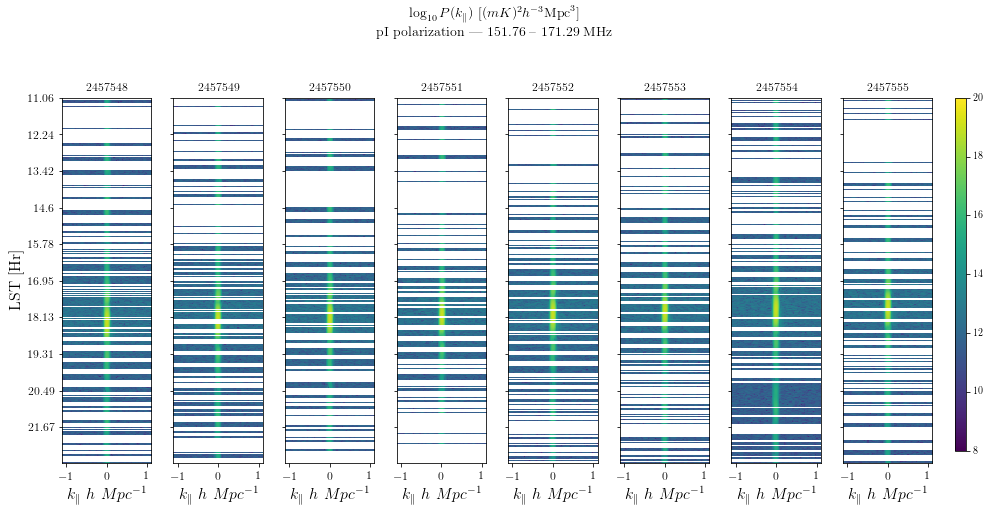

In [11]:
fig, ax = plot_waterfalls(huvps, days, savepath+'waterfalls_highband.pdf')

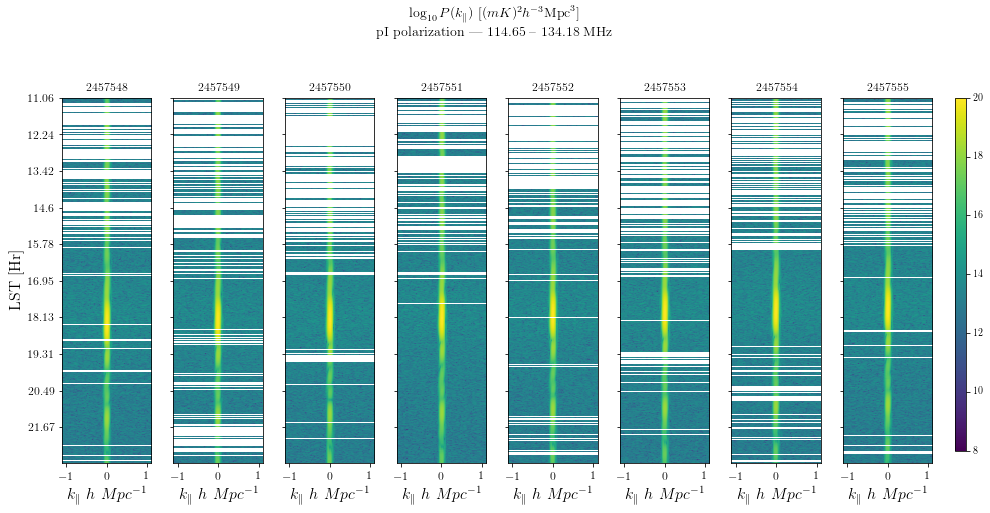

In [12]:
fig, ax = plot_waterfalls(luvps, days, savepath+'waterfalls_lowband.pdf')